<a href="https://colab.research.google.com/github/datawilly/Analisis_de_series_de_tiempo/blob/main/Analisis_de_series_de_tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto de análisis de series de tiempo en precios de acciones

##Generando el Dataframe


En esta celda, primero instalamos la librería Prophet para realizar predicciones de series de tiempo. Luego, importamos varias librerías necesarias para trabajar con los datos y realizar el análisis. Usamos NumPy y Pandas para manejar los datos, y Matplotlib para graficar. También descargamos datos financieros históricos usando yfinance, y tenemos ARIMA y SARIMAX de statsmodels, que son modelos avanzados de predicción para series de tiempo. Además, agregamos herramientas para evaluar los modelos, como el cálculo del error medio cuadrático (MSE) y el error absoluto medio (MAE). Finalmente, incluimos Bokeh para generar gráficos interactivos y seasonal_decompose para descomponer las series de tiempo en componentes de tendencia y estacionalidad

In [ ]:
!pip install prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet

En esta celda, le pedimos al usuario que ingrese el símbolo de la acción que quiere analizar, como "AAPL" para Apple. Luego, utilizamos yfinance para descargar los datos históricos de esa acción, desde el 1 de enero de 2015 hasta el 19 de septiembre de 2024. Estos datos incluyen información como los precios de apertura, cierre, máximo, mínimo y volumen de transacciones. Finalmente, mostramos las primeras filas del DataFrame para que el usuario pueda ver cómo lucen los datos descargados.

In [ ]:
ticker = input("Por favor, ingresa el símbolo de la acción que deseas analizar (por ejemplo: AAPL para Apple): ")
data = yf.download(ticker, start="2015-01-01", end="2024-09-19")
data.head()

Por favor, ingresa el símbolo de la acción que deseas analizar (por ejemplo: AAPL para Apple): msft


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,46.660000,47.419998,46.540001,46.759998,40.232857,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,39.862881,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,39.277798,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,39.776840,29114100
2015-01-08,46.750000,47.750000,46.720001,47.590000,40.946991,29645200


En esta celda, se genera una visualización gráfica del precio de cierre de la acción seleccionada a lo largo del tiempo. Usamos Matplotlib para crear un gráfico de línea donde el eje X representa las fechas y el eje Y muestra el precio de cierre de la acción. También se añade un título al gráfico y etiquetas en los ejes para facilitar la interpretación.

Luego de mostrar el gráfico, utilizamos data.describe() para generar un resumen estadístico de los datos descargados, lo que nos permite ver estadísticas clave como la media, desviación estándar, valores mínimo y máximo, entre otros, para los precios de la acción.

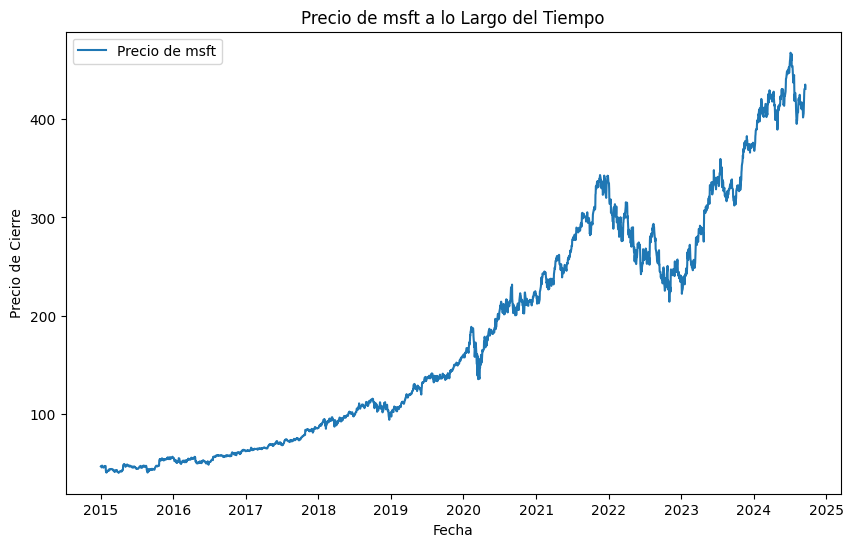

,Open,High,Low,Close,Adj Close,Volume
count,2444.000000,2444.000000,2444.000000,2444.000000,2444.000000,2.444000e+03
mean,180.614869,182.351670,178.793997,180.662615,175.165625,2.911983e+07
std,117.510414,118.562118,116.351781,117.516459,118.485543,1.339488e+07
min,40.340000,40.740002,39.720001,40.290001,34.760632,7.425600e+06
25%,69.379997,69.925001,68.882504,69.740000,64.079209,2.085242e+07
50%,144.029999,145.345001,141.959999,143.889999,137.436516,2.600880e+07
75%,274.052490,277.727501,270.000000,274.167496,269.165329,3.334640e+07
max,467.000000,468.350006,464.459991,467.559998,466.718781,1.691640e+08


In [ ]:
plt.figure(figsize=(10,6))
plt.plot(data.index, data['Close'], label=f'Precio de {ticker}')
plt.title(f'Precio de {ticker} a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.show()

data.describe()

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,46.660000,47.419998,46.540001,46.759998,40.232857,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,39.862881,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,39.277798,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,39.776840,29114100
2015-01-08,46.750000,47.750000,46.720001,47.590000,40.946991,29645200


In [ ]:
data.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2024-09-05', '2024-09-06', '2024-09-09', '2024-09-10',
               '2024-09-11', '2024-09-12', '2024-09-13', '2024-09-16',
               '2024-09-17', '2024-09-18'],
              dtype='datetime64[ns]', name='Date', length=2444, freq=None)

En esta celda, primero configuramos **Bokeh** para que genere gráficos interactivos dentro del notebook con `output_notebook()`. Creamos una copia de la columna de fechas en el DataFrame, necesaria para trabajar con **Bokeh**, y luego usamos esa copia como fuente de datos con `ColumnDataSource`.

A continuación, configuramos un gráfico interactivo de Bokeh que muestra el **precio de cierre** de la acción seleccionada a lo largo del tiempo. Se define un gráfico con el tipo de eje X en formato de fecha y se le añaden herramientas como zoom y desplazamiento. Además, se añade una herramienta de **HoverTool** que permite ver detalles específicos de cada punto en el gráfico cuando se pasa el mouse por encima, mostrando la fecha y el precio correspondiente en formato legible.

Finalmente, se dibuja una línea azul representando el precio de cierre y se coloca una leyenda en la esquina superior izquierda del gráfico. Esto permite al usuario interactuar fácilmente con los datos visualizados.

In [ ]:
output_notebook()

data['Date_copy'] = data.index
source = ColumnDataSource(data)

p = figure(x_axis_type='datetime', title='Precio de MSFT a lo Largo del Tiempo',
           height=400, width=800,
           tools="pan,box_zoom,reset,save",
           toolbar_location="above")

p.xaxis.axis_label = 'Fecha'
p.yaxis.axis_label = 'Precio de Cierre'

hover = HoverTool(
    tooltips=[
        ("Fecha", "@Date_copy{%F}"),
        ("Precio", "@Close{$0,0.00}")
    ],
    formatters={
        '@Date_copy': 'datetime'
    },
    mode='vline'
)

p.add_tools(hover)

p.line('Date_copy', 'Close', source=source, line_width=2, color='navy', legend_label='Precio de MSFT')

p.legend.location = "top_left"

show(p)

In [ ]:
data = data.drop('Date_copy', axis = 1)

Antes de continuar es necesario verificar que tipos de datos tenemos en nuestro DF porque probablemente necesitemos realizar transformaciones para poder manejar los datos

In [ ]:
data.dtypes

,0
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


##Graficando nuestros datos

En esta celda, primero **limpiamos los datos** de la columna de precios de cierre ("Close") usando el método de interpolación, lo que ayuda a rellenar cualquier valor faltante de manera suave y lógica.

Después de tener los datos limpios, aplicamos la función `seasonal_decompose` para descomponer la serie de tiempo en **componentes estacionales, de tendencia y residuales**. Usamos el modelo multiplicativo, que es adecuado cuando las fluctuaciones de los datos dependen de la magnitud del valor. Además, definimos un período de 365 días para capturar los patrones anuales en los datos.

Finalmente, mostramos las gráficas de los componentes descompuestos, lo que permite visualizar de manera separada las **tendencias**, **patrones estacionales** y **residuos** de la serie de tiempo. Esto nos da una mejor comprensión de los elementos subyacentes en la evolución del precio de la acción.

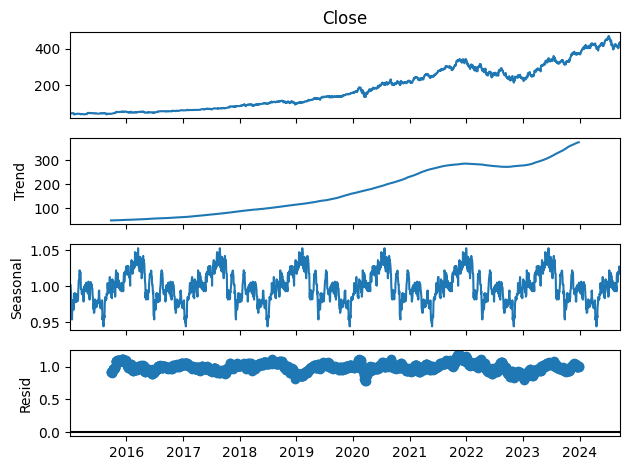

In [ ]:
data_clean = data['Close'].interpolate()

result = seasonal_decompose(data_clean, model='multiplicative', period=365)

result.plot()
plt.show()

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,46.660000,47.419998,46.540001,46.759998,40.232857,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,39.862881,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,39.277798,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,39.776840,29114100
2015-01-08,46.750000,47.750000,46.720001,47.590000,40.946991,29645200


En esta celda, estamos aplicando el **modelo ARIMA** (AutoRegressive Integrated Moving Average) para modelar y predecir la serie de tiempo del precio de cierre de la acción.

Usamos el orden **(5, 1, 0)**, lo que significa:
- **5** términos autorregresivos (AR),
- **1** diferenciación para hacer la serie estacionaria (I),
- **0** términos de promedio móvil (MA).

Primero creamos el modelo con `ARIMA` y luego lo ajustamos a los datos con `fit()`. Al final, mostramos un **resumen estadístico** del modelo ajustado, que incluye detalles como los coeficientes de los términos, el error estándar, la probabilidad (P>|z|), y otros indicadores clave que nos permiten evaluar la calidad del modelo. Este resumen es útil para entender cómo se ajusta el modelo ARIMA a los datos de la serie de tiempo.

In [ ]:
model = ARIMA(data['Close'], order=(5, 1, 0))
model_fit = model.fit()

print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2444
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6530.422
Date:                Sat, 21 Sep 2024   AIC                          13072.844
Time:                        19:41:22   BIC                          13107.649
Sample:                             0   HQIC                         13085.495
                               - 2444                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0873      0.012     -7.027      0.000      -0.112      -0.063
ar.L2         -0.0380      0.013     -2.922      0.003      -0.063      -0.013
ar.L3         -0.0089      0.014     -0.633      0.5

Este es el **resumen estadístico** del modelo ARIMA que hemos ajustado a los precios de cierre de la acción, y aquí hay una interpretación de los resultados clave:

- Los **coeficientes autorregresivos (AR)** (`ar.L1`, `ar.L2`, etc.) nos indican cómo los valores pasados de la serie de tiempo están afectando a los valores actuales. Por ejemplo, el coeficiente para `ar.L1` es **-0.0873**, lo que significa que el valor del día anterior tiene una influencia negativa en el valor actual, pero no es un impacto muy fuerte. Los coeficientes con un valor de **P>|z|** cercano a 0 (como `ar.L1` y `ar.L2`) son estadísticamente significativos, lo que indica que estos términos contribuyen de manera importante al modelo.

- **Sigma2**, que es **12.2846**, representa la varianza del término de error. Este valor nos da una idea de la magnitud de los errores en el modelo. Un valor relativamente alto sugiere que los errores tienen bastante variabilidad, lo que puede indicar una cierta volatilidad en la serie.

- El **AIC** (Criterio de Información de Akaike) es **13072.844** y el **BIC** es **13107.649**. Estos valores nos ayudan a comparar la calidad de ajuste del modelo: cuanto menores sean estos valores, mejor es el ajuste. En este caso, los valores son relativamente altos, lo que podría sugerir que aún hay espacio para mejorar el modelo, tal vez probando otros valores para los parámetros ARIMA o utilizando un modelo alternativo.

- La **prueba de Ljung-Box** con un valor de **Prob(Q) = 0.99** sugiere que no hay autocorrelación significativa en los residuos del modelo, lo cual es positivo, ya que indica que el modelo está capturando bien la estructura de autocorrelación de los datos.

- La **prueba de Jarque-Bera** con un valor muy bajo de **Prob(JB) = 0.00** indica que los residuos no siguen una distribución normal. Esto es algo que podríamos intentar mejorar ajustando mejor el modelo o explorando modelos no lineales.

- Finalmente, la **asimetría** (skewness) es ligeramente negativa con un valor de **-0.24**, lo que sugiere que los residuos tienen una ligera tendencia a tener valores menores, y la **kurtosis** es bastante alta (**7.72**), lo que indica que hay más valores extremos de lo que esperaríamos bajo una distribución normal.

En resumen, este análisis indica que el modelo ARIMA está capturando parte de la dinámica de la serie de tiempo, pero los resultados también sugieren que podría haber espacio para mejorar, especialmente debido a la falta de normalidad en los residuos y la varianza relativamente alta de los errores.

En esta celda, estamos utilizando el modelo **SARIMA** (Seasonal ARIMA), que es una extensión del modelo ARIMA, pero con componentes adicionales para capturar patrones estacionales en los datos.

Primero, creamos el modelo **SARIMAX** con los parámetros:
- **(5, 1, 0)** para los términos de autorregresión (AR), diferenciación (I) y promedio móvil (MA), igual que en el modelo ARIMA anterior.
- **(1, 1, 1, 12)** como parte del orden estacional, donde:
  - 1 es el número de términos autorregresivos estacionales.
  - 1 es el grado de diferenciación estacional.
  - 1 es el número de términos de promedio móvil estacional.
  - 12 indica que estamos capturando un patrón estacional con una periodicidad de 12 meses.

Después de ajustar el modelo con `fit()`, imprimimos un **resumen** del ajuste que nos muestra información detallada del modelo, similar al resumen de ARIMA, pero con la inclusión de términos estacionales.

A continuación, realizamos una **predicción a 360 días** hacia el futuro y creamos un índice de fechas para esos días.

Finalmente, generamos un gráfico que muestra el **precio de cierre actual** de la acción a lo largo del tiempo, junto con la **predicción del modelo SARIMA** para los próximos 360 días. Este gráfico permite visualizar cómo el modelo proyecta el comportamiento del precio en el futuro, con una línea verde que representa la predicción.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                 2444
Model:             SARIMAX(5, 1, 0)x(1, 1, [1], 12)   Log Likelihood               -6529.183
Date:                              Sat, 21 Sep 2024   AIC                          13074.367
Time:                                      19:41:59   BIC                          13120.735
Sample:                                           0   HQIC                         13091.225
                                             - 2444                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0889      0.012     -7.126      0.000      -0.113      -0.064
ar.L2         -0.04

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


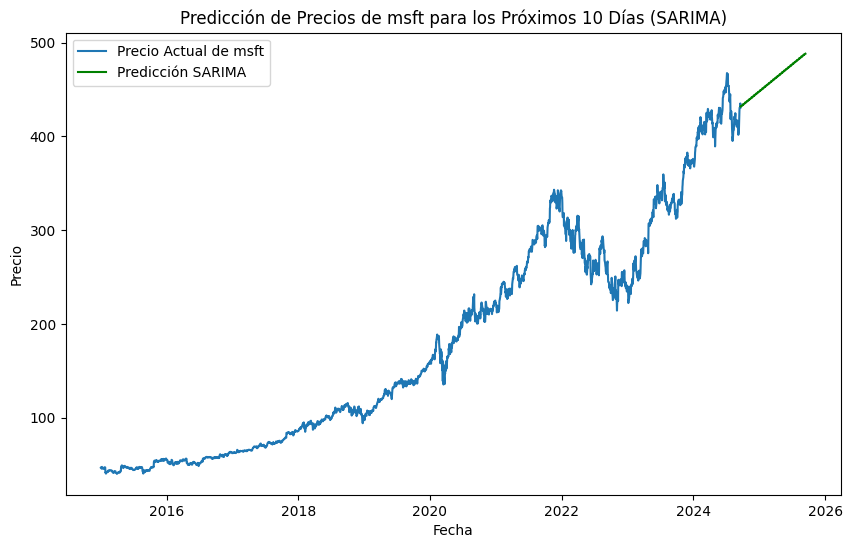

In [ ]:
sarima_model = SARIMAX(data['Close'], order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()

print(sarima_fit.summary())

forecast_sarima = sarima_fit.forecast(steps=360)

forecast_index = pd.date_range(start=data.index[-1], periods=360 + 1, freq='D')[1:]

plt.figure(figsize=(10,6))
plt.plot(data.index, data['Close'], label=f'Precio Actual de {ticker}')
plt.plot(forecast_index, forecast_sarima, label='Predicción SARIMA', color='green')
plt.title(f'Predicción de Precios de {ticker} para los Próximos 10 Días (SARIMA)')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()

Este es el **resumen estadístico** del modelo **SARIMA** ajustado, y aquí está una interpretación de los resultados clave:

- Los **coeficientes autorregresivos (AR)** (`ar.L1`, `ar.L2`, etc.) muestran cómo los valores pasados de la serie influyen en los valores actuales. En este caso, los coeficientes `ar.L1` y `ar.L2` son significativos (sus valores de **P>|z|** son cercanos a 0), lo que indica que estos términos contribuyen a la predicción. Los otros términos (`ar.L3`, `ar.L4`) no parecen ser estadísticamente significativos.
  
- El **término estacional autorregresivo (ar.S.L12)** y el **término de promedio móvil estacional (ma.S.L12)** capturan los efectos que se repiten cada 12 meses. El coeficiente de `ar.S.L12` es prácticamente cero, lo que indica que no tiene un impacto significativo. Por otro lado, `ma.S.L12` tiene un valor cercano a -1, lo que sugiere que los patrones estacionales de promedio móvil tienen una influencia considerable en la serie, aunque el valor P de **0.094** indica que este coeficiente no es significativamente diferente de cero al nivel del 5%.

- **Sigma2**, que es **12.2751**, representa la varianza del término de error. Este valor nos da una idea de la magnitud de los errores en el modelo, aunque el valor de **P>|z|** para este término es **0.093**, lo que sugiere que la varianza estimada puede no ser precisa, ya que no es estadísticamente significativa.

- El **AIC** (Criterio de Información de Akaike) es **13074.367** y el **BIC** es **13120.735**, que son métricas que ayudan a comparar la calidad del ajuste del modelo. Cuanto menores sean estos valores, mejor es el ajuste. Comparado con el modelo ARIMA previo, estos valores son similares, lo que indica que el componente estacional no aporta mucho al modelo.

- La **prueba de Ljung-Box** con un valor de **Prob(Q) = 0.94** sugiere que no hay autocorrelación significativa en los residuos del modelo, lo cual es positivo, ya que indica que el modelo está capturando bien la estructura de autocorrelación en los datos.

- La **prueba de Jarque-Bera** con un valor de **Prob(JB) = 0.00** indica que los residuos no siguen una distribución normal. Esto significa que los residuos presentan comportamientos extremos o no lineales que el modelo no está capturando bien.

- Finalmente, la **asimetría** (skew) de **-0.27** y la **kurtosis** de **7.66** sugieren que los residuos son ligeramente sesgados hacia la izquierda y presentan colas más largas que en una distribución normal.

En resumen, este modelo **SARIMA** incluye un componente estacional que parece tener un impacto limitado, dado que muchos de los coeficientes estacionales no son estadísticamente significativos. Sin embargo, el modelo es comparable en calidad al ARIMA y podría ser útil para predecir tendencias si se ajusta mejor el componente estacional.

En esta celda, estamos aplicando una transformación logarítmica a los datos del precio de cierre de la acción para estabilizar la varianza y hacer que la serie de tiempo sea más adecuada para el modelado.

Primero, tomamos el logaritmo natural de los precios de cierre con `np.log()`, lo que nos ayuda a suavizar las fluctuaciones grandes y facilitar el ajuste del modelo ARIMA. Luego, ajustamos el modelo **ARIMA** sobre los datos logarítmicos con el mismo orden **(5, 1, 0)** que en los modelos anteriores.

Una vez ajustado el modelo, generamos una **predicción a 360 días** hacia el futuro en el espacio logarítmico. Como la predicción está en una escala logarítmica, utilizamos `np.exp()` para volver a transformar los datos a su escala original de precios.

Finalmente, graficamos tanto los precios históricos de la acción como las predicciones ajustadas del modelo **Log-ARIMA**. El gráfico muestra los precios reales de la acción en el pasado y los precios predichos para los próximos 360 días, representados por una línea púrpura, lo que permite comparar el comportamiento previsto con el comportamiento histórico.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

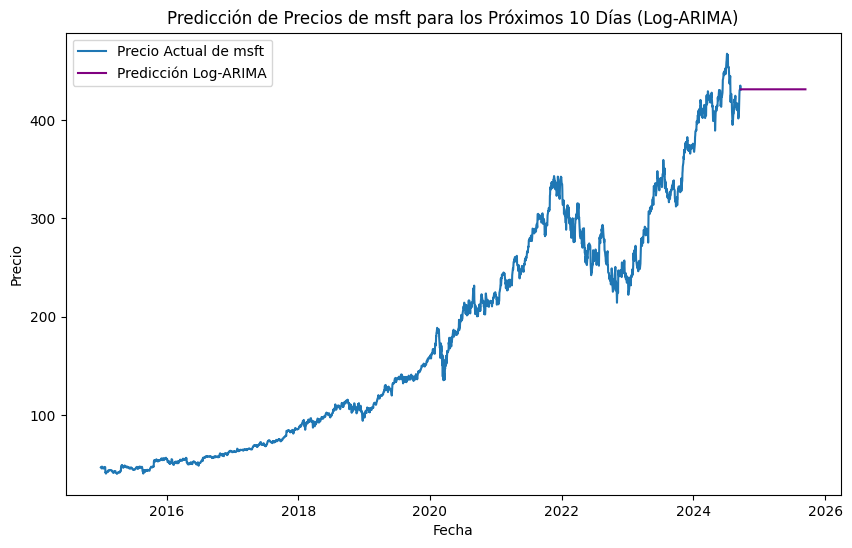

In [ ]:
log_data = np.log(data['Close'])

model_log = ARIMA(log_data, order=(5, 1, 0))
model_log_fit = model_log.fit()

log_forecast = model_log_fit.forecast(steps=360)

forecast_exp = np.exp(log_forecast)

plt.figure(figsize=(10,6))
plt.plot(data.index, data['Close'], label=f'Precio Actual de {ticker}')
plt.plot(forecast_index, forecast_exp, label='Predicción Log-ARIMA', color='purple')
plt.title(f'Predicción de Precios de {ticker} para los Próximos 10 Días (Log-ARIMA)')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()

En esta celda estamos utilizando **Facebook Prophet** para hacer una predicción de los precios de la acción para los próximos 360 días. Prophet es un modelo diseñado para series de tiempo con fuertes patrones de tendencia y estacionalidad.

Primero, reorganizamos los datos para que Prophet pueda trabajar con ellos. Cambiamos el nombre de las columnas: la columna de fechas ahora se llama **'ds'** y la de precios de cierre se llama **'y'**, que es el formato que Prophet requiere.

Luego, ajustamos el modelo **Prophet** a estos datos con `model_prophet.fit()`. A continuación, creamos un nuevo conjunto de datos que incluye 360 días futuros, lo que nos permite realizar predicciones de largo plazo.

Finalmente, graficamos los resultados. Mostramos:
- La **predicción** de Prophet para los precios futuros con una línea azul.
- La **tendencia** capturada por el modelo a largo plazo con una línea verde.

El gráfico presenta tanto los valores predichos como la tendencia subyacente, lo que nos permite visualizar no solo las predicciones puntuales sino también cómo el modelo ve el comportamiento general de los precios de la acción en el futuro.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkbaa77cg/4n90lwew.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkbaa77cg/m0xid2aw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82138', 'data', 'file=/tmp/tmpkbaa77cg/4n90lwew.json', 'init=/tmp/tmpkbaa77cg/m0xid2aw.json', 'output', 'file=/tmp/tmpkbaa77cg/prophet_modelp_ir3xje/prophet_model-20240921194302.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:43:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:43:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in 

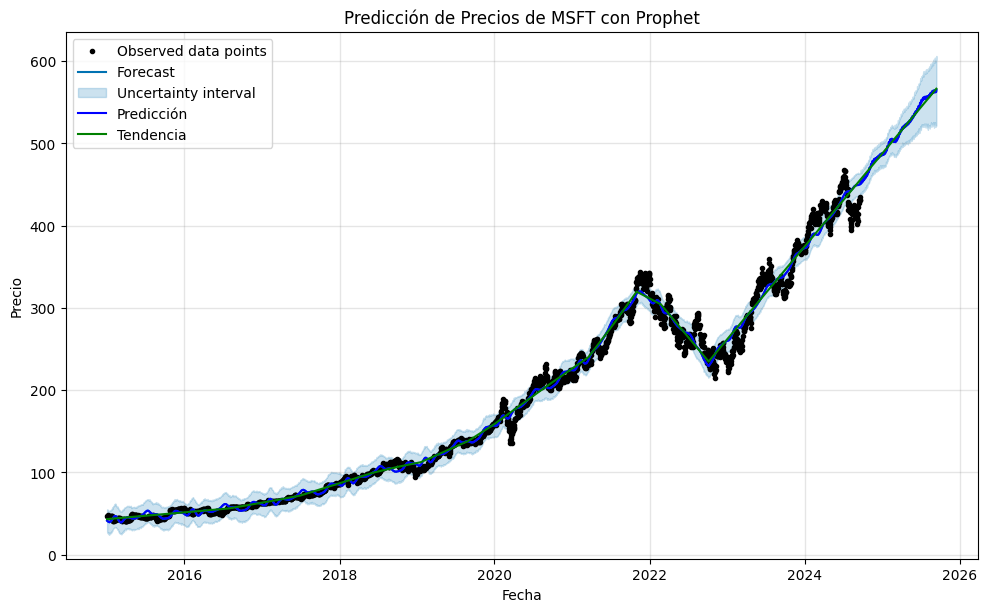

In [ ]:
df_prophet = data['Close'].reset_index()
df_prophet.columns = ['ds', 'y']

model_prophet = Prophet()
model_prophet.fit(df_prophet)

future = model_prophet.make_future_dataframe(periods=360)
forecast_prophet = model_prophet.predict(future)

fig = model_prophet.plot(forecast_prophet, xlabel='Fecha', ylabel='Precio')

plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Predicción', color='blue')  # Línea de predicción
plt.plot(forecast_prophet['ds'], forecast_prophet['trend'], label='Tendencia', color='green')  # Línea de tendencia

plt.legend()

plt.title(f'Predicción de Precios de MSFT con Prophet')
plt.show()

En esta celda estamos utilizando **Facebook Prophet** para realizar un modelo ajustado de predicción de precios de la acción, pero con algunos elementos adicionales que mejoran su precisión y flexibilidad.

Primero, convertimos los precios de cierre a su **escala logarítmica** para suavizar las fluctuaciones grandes. Esto ayuda a que el modelo se ajuste mejor a los datos. Luego, añadimos un conjunto de **días festivos** (Navidades en este caso) para que Prophet tenga en cuenta esos días en sus predicciones y capture cualquier patrón asociado a ellos.

Prophet también permite ajustar la sensibilidad del modelo a los cambios abruptos mediante el parámetro `changepoint_prior_scale`, que aquí hemos aumentado a **0.9**, haciéndolo más reactivo a cambios repentinos en la tendencia.

Además, añadimos una estacionalidad **trimestral** personalizada (cada 91.25 días), ya que los precios de las acciones pueden mostrar comportamientos estacionales en intervalos más cortos que los años.

Después de ajustar el modelo, generamos predicciones para los próximos 365 días y **revertimos la transformación logarítmica** para que las predicciones vuelvan a estar en la escala original de precios.

Finalmente, graficamos:
- **Los valores observados** en negro.
- **La predicción** en azul.
- **La tendencia general** en verde.

Limitamos el gráfico a no mostrar precios por debajo de 25 dólares (`plt.ylim(bottom=25)`) para mejorar la visualización y permitir una mejor comparación entre los valores observados y los predichos. Esto nos ofrece un análisis ajustado y más completo de cómo el modelo Prophet predice los precios futuros de la acción.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpkbaa77cg/3iidodlq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkbaa77cg/xl940fy3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56045', 'data', 'file=/tmp/tmpkbaa77cg/3iidodlq.json', 'init=/tmp/tmpkbaa77cg/xl940fy3.json', 'output', 'file=/tmp/tmpkbaa77cg/prophet_modelx95nt9kx/prophet_model-20240921211553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:15:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:15:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray.

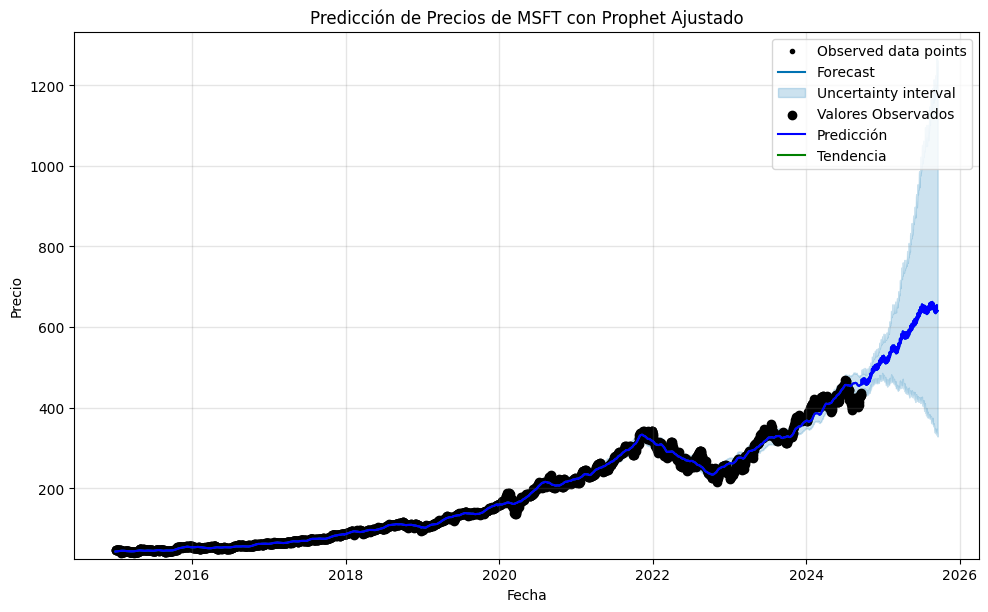

In [ ]:
df_prophet = data['Close'].reset_index()
df_prophet.columns = ['ds', 'y']

df_prophet['y'] = np.log(df_prophet['y'])

holidays = pd.DataFrame({
  'holiday': 'holiday',
  'ds': pd.to_datetime(['2016-12-25', '2017-12-25', '2018-12-25', '2019-12-25', '2020-12-25']),
  'lower_window': 0,
  'upper_window': 1,
})

model_prophet = Prophet(
    changepoint_prior_scale=0.9,
    holidays=holidays,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)

model_prophet.add_seasonality(name='quarterly', period=91.25, fourier_order=5)

model_prophet.fit(df_prophet)

future = model_prophet.make_future_dataframe(periods=365)

forecast_prophet = model_prophet.predict(future)

forecast_prophet['yhat'] = np.exp(forecast_prophet['yhat'])
forecast_prophet['yhat_lower'] = np.exp(forecast_prophet['yhat_lower'])
forecast_prophet['yhat_upper'] = np.exp(forecast_prophet['yhat_upper'])

df_prophet['y'] = np.exp(df_prophet['y'])

fig = model_prophet.plot(forecast_prophet, xlabel='Fecha', ylabel='Precio')

plt.scatter(df_prophet['ds'], df_prophet['y'], color='black', label='Valores Observados')

plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Predicción', color='blue')
plt.plot(forecast_prophet['ds'], forecast_prophet['trend'], label='Tendencia', color='green')

plt.ylim(bottom=25)

plt.legend()

plt.title('Predicción de Precios de MSFT con Prophet Ajustado')
plt.show()


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,46.660000,47.419998,46.540001,46.759998,40.232857,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,39.862881,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,39.277798,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,39.776840,29114100
2015-01-08,46.750000,47.750000,46.720001,47.590000,40.946991,29645200


En esta celda estamos calculando dos métricas clave para evaluar el rendimiento del modelo **Prophet**: el **RMSE** (Root Mean Squared Error) y el **MAE** (Mean Absolute Error).

Primero, extraemos los **valores observados** de la columna 'y' del DataFrame que contiene los precios reales y los comparamos con las **predicciones** del modelo Prophet ('yhat'). Debido a que es posible que el número de predicciones no coincida exactamente con el número de valores observados, ajustamos ambos conjuntos de datos para que tengan la misma longitud (`min_length`), asegurando que comparamos correctamente los valores observados con los predichos.

Luego calculamos:
- **RMSE**: La raíz del error cuadrático medio, que nos indica qué tan lejos, en promedio, están las predicciones de los valores observados. Un RMSE más bajo significa un mejor ajuste del modelo.
- **MAE**: El error absoluto medio, que mide la magnitud media de los errores sin tener en cuenta su signo. Es una métrica útil para entender el error promedio de las predicciones.

Finalmente, imprimimos ambos resultados para ver qué tan bien está funcionando el modelo Prophet en la predicción de los precios de la acción. Estos valores nos permiten cuantificar la precisión del modelo y evaluar si necesitamos ajustar o mejorar algún aspecto del mismo.

In [ ]:
actual = df_prophet['y'].iloc[-len(forecast_prophet):].dropna()
predicted = forecast_prophet['yhat'].iloc[-len(actual):].dropna()

min_length = min(len(actual), len(predicted))
actual = actual.iloc[:min_length]
predicted = predicted.iloc[:min_length]

rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 101.70601448075189
MAE: 79.55810752049604
